In [13]:
# Importing the core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Churn_Modelling.csv') 

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Drop columns that are not useful
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.shape

(10000, 11)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [20]:
# Checking for NULL values in the dataframe
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
# Convert integer to string
df['NumOfProducts'] = df['NumOfProducts'].astype(str)
df['HasCrCard'] = df['HasCrCard'].astype(str)
df['IsActiveMember'] = df['IsActiveMember'].astype(str)
df['Exited'] = df['Exited'].astype(str)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

# Exploratory Data Analysis

### Univariate Analysis

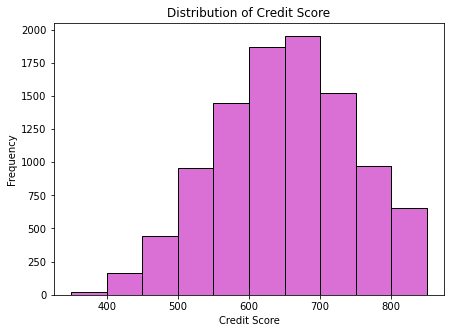

In [22]:
# Distribution of Credit Score
plt.rcParams.update({'font.size': 10, 'figure.figsize': (7, 5)})
plt.hist(df['CreditScore'], color = 'orchid', edgecolor = 'black')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

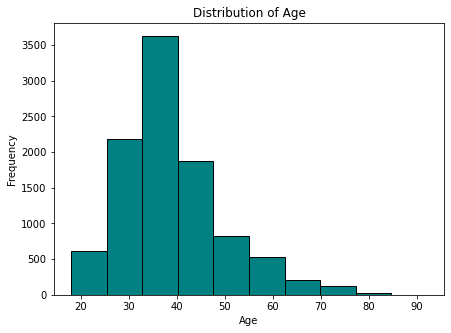

In [23]:
# Distribution of Age
plt.hist(df['Age'], color = 'teal', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

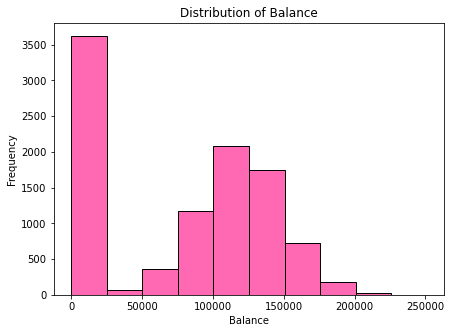

In [24]:
# Distribution of Balance
plt.hist(df['Balance'], color = 'hotpink', edgecolor = 'black')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

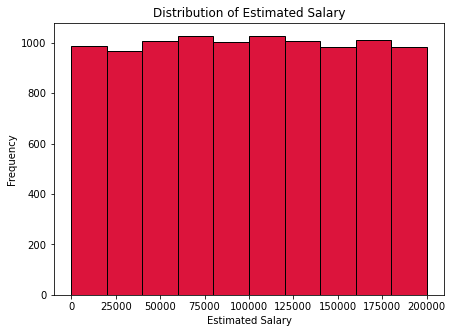

In [25]:
# Distribution of Estimated Salary
plt.hist(df['EstimatedSalary'], color = 'crimson', edgecolor = 'black')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
plt.show()

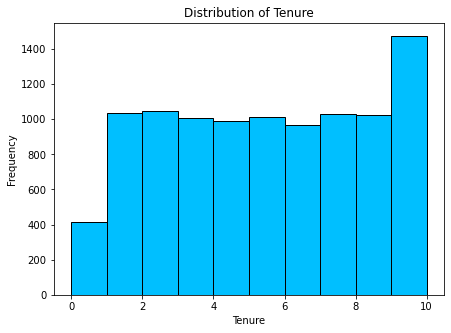

In [26]:
# Distribution of Tenure
plt.hist(df['Tenure'], color = 'deepskyblue', edgecolor = 'black')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')
plt.show()

<AxesSubplot:>

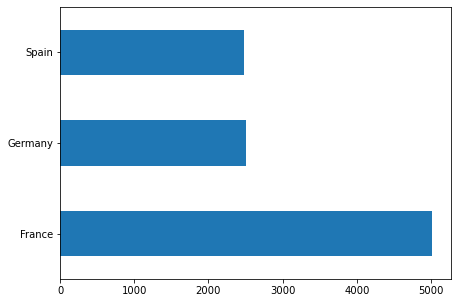

In [27]:
# Distribution of Geography
df['Geography'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

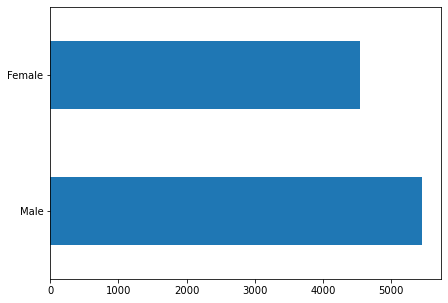

In [28]:
# Distribution of Gender
df['Gender'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

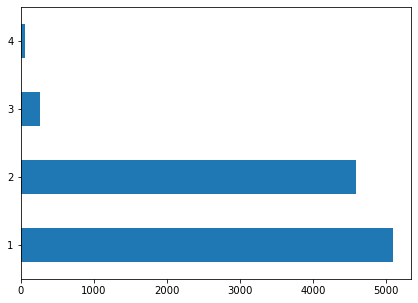

In [29]:
# Distribution of Number of Products
df['NumOfProducts'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

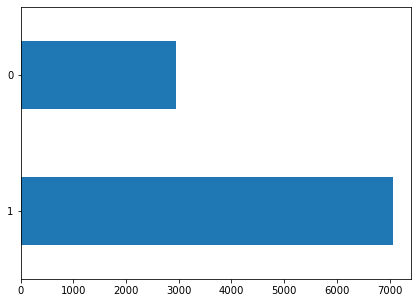

In [30]:
# Distribution of HasCrCard
df['HasCrCard'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

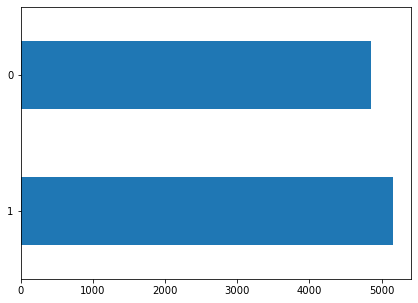

In [31]:
# Distribution of IsActiveMember
df['IsActiveMember'].value_counts().plot(kind = 'barh')

0    7963
1    2037
Name: Exited, dtype: int64

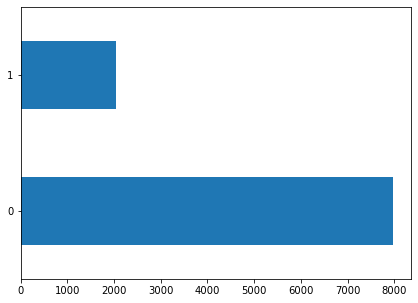

In [32]:
# Distribution of Target (Exited)
df['Exited'].value_counts().plot(kind = 'barh')
df['Exited'].value_counts()

Text(0.5, 1.0, 'Class Distribution')

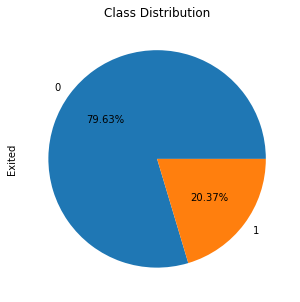

In [33]:
# Pie chart plot for class distribution
ax = df['Exited'].value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%')
ax.set_title("Class Distribution")

Notice that the dataset is mildly imbalanced (Class 1 to Class 0 is 1:3.909)

### Bivariate Analysis

<AxesSubplot:xlabel='Geography'>

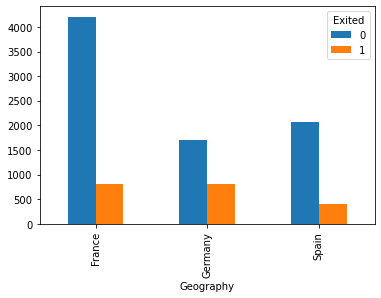

In [34]:
crosstab = pd.crosstab(index=df['Geography'],columns=df['Exited'])
%matplotlib inline 
crosstab.plot.bar()

<AxesSubplot:xlabel='Gender'>

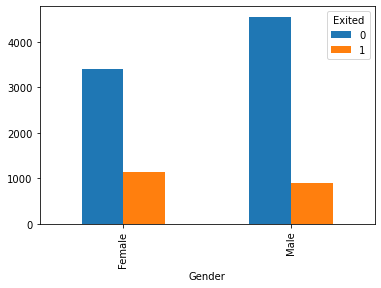

In [35]:
crosstab = pd.crosstab(index=df['Gender'],columns=df['Exited'])
%matplotlib inline 
crosstab.plot.bar()

<AxesSubplot:xlabel='NumOfProducts'>

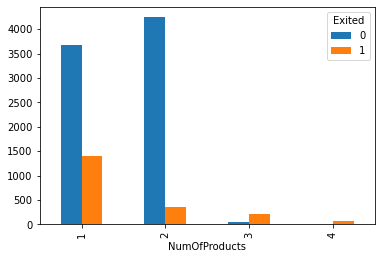

In [36]:
crosstab = pd.crosstab(index=df['NumOfProducts'],columns=df['Exited'])
%matplotlib inline 
crosstab.plot.bar()

<AxesSubplot:xlabel='HasCrCard'>

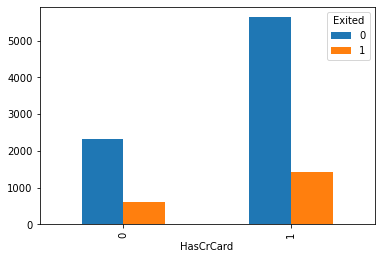

In [37]:
crosstab = pd.crosstab(index=df['HasCrCard'],columns=df['Exited'])
%matplotlib inline 
crosstab.plot.bar()

<AxesSubplot:xlabel='IsActiveMember'>

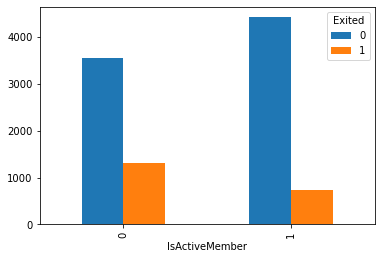

In [38]:
crosstab = pd.crosstab(index=df['IsActiveMember'],columns=df['Exited'])
%matplotlib inline 
crosstab.plot.bar()

C:\Users\kamka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore', ylabel='Exited'>

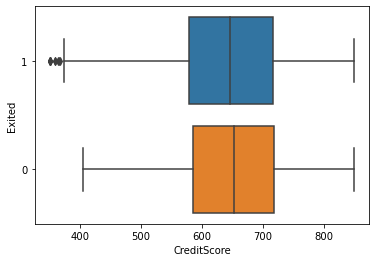

In [39]:
sns.boxplot(df.CreditScore, df.Exited)

C:\Users\kamka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Exited'>

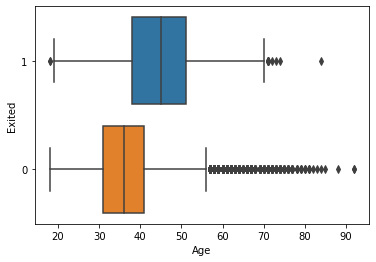

In [40]:
sns.boxplot(df.Age, df.Exited)

C:\Users\kamka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

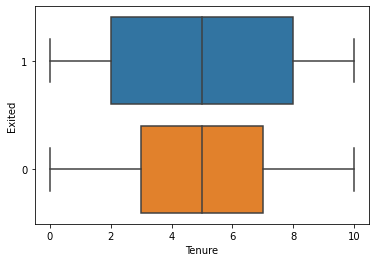

In [41]:
sns.boxplot(df.Tenure, df.Exited)

C:\Users\kamka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance', ylabel='Exited'>

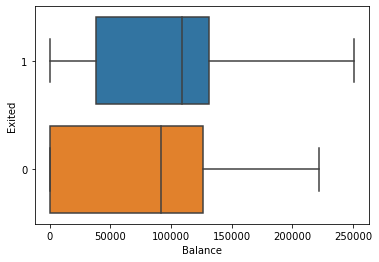

In [42]:
sns.boxplot(df.Balance, df.Exited)

C:\Users\kamka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

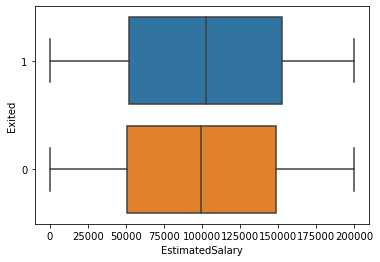

In [43]:
sns.boxplot(df.EstimatedSalary, df.Exited)

# Data Preprosessing

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
# Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [46]:
df.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [47]:
df['Geography'] = df['Geography'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts       object
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [48]:
# save the csv out
df.to_csv(r'After_Preprocess_Churn_Modelling.csv', index = False,header = True)

In [49]:
# Setting the features and target
target = df['Exited']
features = df.drop('Exited', axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# Baseline Model

In [51]:
# Importing metrics libraries
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score


def cross_validation(model, _X, _y, _cv=10):
    _scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
    results = cross_validate(estimator=model, X=_X, y=_y, cv=_cv, scoring=_scoring, return_train_score=True)

    return {
        "Training Accuracy": results['train_accuracy'].mean(),
        "Training Precision (weighted_Avg)": results['train_precision_weighted'].mean(),
        "Training Recall (weighted_Avg)": results['train_recall_weighted'].mean(),
        "Training F1 Score (weighted_Avg)": results['train_f1_weighted'].mean(),
        "Validation Accuracy": results['test_accuracy'].mean(),
        "Validation Precision (weighted_Avg)": results['test_precision_weighted'].mean(),
        "Validation Recall (weighted_Avg)": results['test_recall_weighted'].mean(),
        "Validation F1 Score (weighted_Avg)": results['test_f1_weighted'].mean(),
    }



In [52]:
# train and validate 
dummy_clf = DummyClassifier(strategy='uniform',random_state=0)
dummy_clf.fit(x_train, y_train)
dummy_freq_score = cross_validation(dummy_clf, x_train, y_train, 10)
print(dummy_freq_score)

# test
y_predict=dummy_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dummy_clf_score=f1_score(y_test, y_predict, average='weighted')

{'Training Accuracy': 0.5025555555555556, 'Training Precision (weighted_Avg)': 0.6801958874457483, 'Training Recall (weighted_Avg)': 0.5025555555555556, 'Training F1 Score (weighted_Avg)': 0.5501924890328501, 'Validation Accuracy': 0.50175, 'Validation Precision (weighted_Avg)': 0.6852911404874937, 'Validation Recall (weighted_Avg)': 0.50175, 'Validation F1 Score (weighted_Avg)': 0.549081002479688}
[[769 826]
 [212 193]]
              precision    recall  f1-score   support

           0       0.78      0.48      0.60      1595
           1       0.19      0.48      0.27       405

    accuracy                           0.48      2000
   macro avg       0.49      0.48      0.43      2000
weighted avg       0.66      0.48      0.53      2000



# Experiment Set 1: Comparing Machine Learning Algorithms

In [53]:
# Hyperparameter Optimization function
from sklearn.model_selection import GridSearchCV
def gridSearch(model,grid,_X,_y):
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='f1_weighted',error_score=0)
    grid_result = grid_search.fit(_X, _y)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

### KNN

In [54]:
# Hyperparameter search
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
p=[1,2]
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,p=p)
gridSearch(knn_clf,grid,x_train,y_train)

Best: 0.713747 using {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.685618 (0.017061) with: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.685618 (0.017061) with: {'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.682349 (0.017450) with: {'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.682349 (0.017450) with: {'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.707322 (0.010214) with: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.699025 (0.012293) with: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.705226 (0.010728) with: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.695007 (0.012636) with: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.712016 (0.007091) with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.705117 (0.010364) with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.711738 (0.008726) with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.704657 (0.010203) with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.711118 (0.005774) with

In [55]:
# train and validate
knn_clf = KNeighborsClassifier(n_neighbors=9,weights='uniform',p=2) 
knn_clf.fit(x_train,y_train)
knn_score=cross_validation(knn_clf, x_train, y_train, 10)
knn_score

{'Training Accuracy': 0.8013888888888889,
 'Training Precision (weighted_Avg)': 0.7628199435632321,
 'Training Recall (weighted_Avg)': 0.8013888888888889,
 'Training F1 Score (weighted_Avg)': 0.7385707406912825,
 'Validation Accuracy': 0.7823749999999999,
 'Validation Precision (weighted_Avg)': 0.6958283301288596,
 'Validation Recall (weighted_Avg)': 0.7823749999999999,
 'Validation F1 Score (weighted_Avg)': 0.7137466309076045}

In [56]:
# testing
y_predict=knn_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
knn_clf_score= f1_score(y_test, y_predict, average='weighted')

[[1549   46]
 [ 387   18]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.28      0.04      0.08       405

    accuracy                           0.78      2000
   macro avg       0.54      0.51      0.48      2000
weighted avg       0.70      0.78      0.72      2000



### DecisionTree

In [57]:
# Hyperparameter search
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
max_depth = range(1,10)
min_samples_leaf=range(1,30)
max_leaf_nodes=range(2,10)
criterion = ["gini", "entropy"]
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,criterion=criterion)
gridSearch(dt_clf,grid,x_train,y_train)

Best: 0.831791 using {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 1}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 3}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 4}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 5}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 6}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 7}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 8}
0.705586 (0.000690) with: {'crite

In [58]:
# train and validate
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0)
dt_clf.fit(x_train,y_train)
dt_score=cross_validation(dt_clf, x_train, y_train, 10)
dt_score

{'Training Accuracy': 0.8497083333333334,
 'Training Precision (weighted_Avg)': 0.8379784072154587,
 'Training Recall (weighted_Avg)': 0.8497083333333334,
 'Training F1 Score (weighted_Avg)': 0.8327658874097732,
 'Validation Accuracy': 0.849,
 'Validation Precision (weighted_Avg)': 0.8372715726564589,
 'Validation Recall (weighted_Avg)': 0.849,
 'Validation F1 Score (weighted_Avg)': 0.8317910199659979}

In [59]:
# testing
y_predict=dt_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dt_clf_score= f1_score(y_test, y_predict, average='weighted')

[[1520   75]
 [ 216  189]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.47      0.57       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



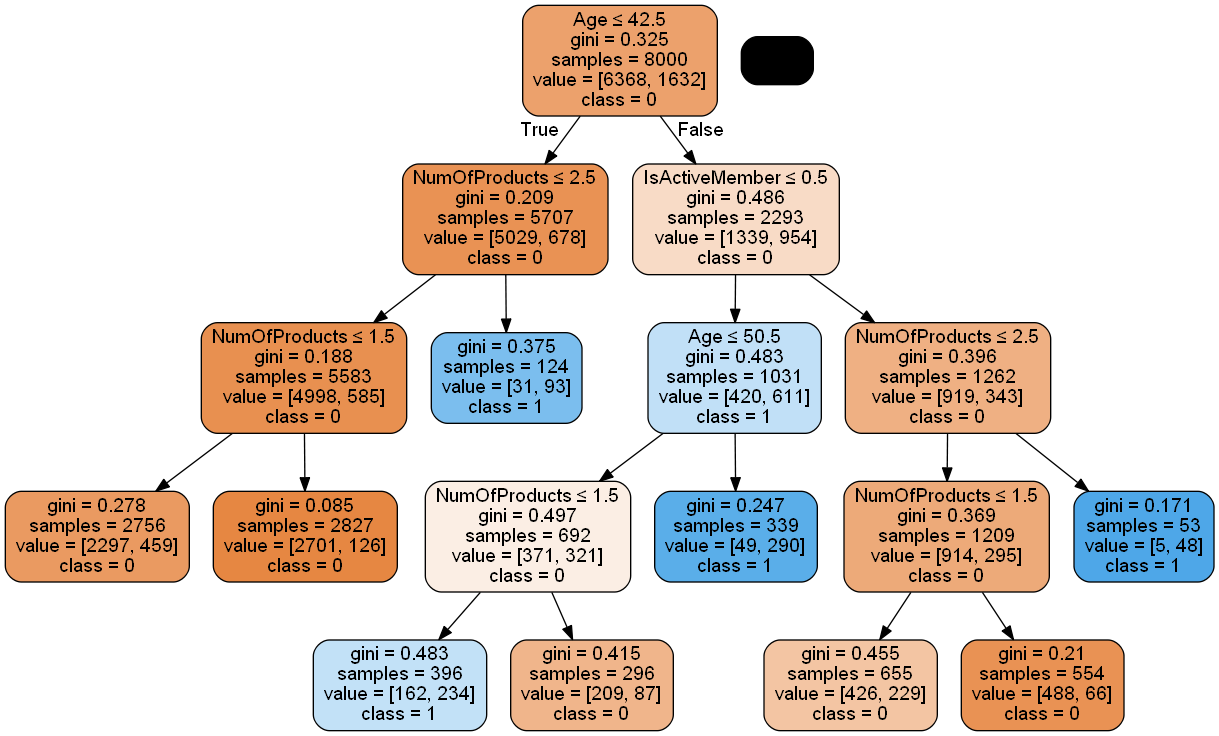

In [60]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dt_clf, out_file = dot_data,
class_names = ['0', '1'], # name of each of the target classes in asce
feature_names = x_train.columns, # the feature names.
filled = True, # whether to fill in the boxes with colors.
rounded = True, # whether to round the corners of the boxes.
special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [61]:
# Load export_text library
from sklearn.tree import export_text
tree_rules = export_text(dt_clf, feature_names=list(x_train))
# Print deccision tree rules
print(tree_rules)

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- class: 1
|--- Age >  42.50
|   |--- IsActiveMember <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  50.50
|   |   |   |--- class: 1
|   |--- IsActiveMember >  0.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1



### Naive Bayes

In [62]:
# Hyperparameter search
alpha = [0.1,1,10,20,30,40,50,60,70,80,90,100]

# Import the Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
grid = dict(alpha=alpha)
gridSearch(bnb,grid,x_train,y_train)

Best: 0.706679 using {'alpha': 70}
0.705758 (0.001074) with: {'alpha': 0.1}
0.705758 (0.001074) with: {'alpha': 1}
0.705572 (0.000974) with: {'alpha': 10}
0.706042 (0.001230) with: {'alpha': 20}
0.706216 (0.001618) with: {'alpha': 30}
0.706509 (0.002145) with: {'alpha': 40}
0.706383 (0.002139) with: {'alpha': 50}
0.706383 (0.002139) with: {'alpha': 60}
0.706679 (0.002175) with: {'alpha': 70}
0.706679 (0.002175) with: {'alpha': 80}
0.706383 (0.002139) with: {'alpha': 90}
0.706383 (0.002139) with: {'alpha': 100}


In [63]:
# train and validate
bnb_clf = BernoulliNB(alpha=70)
bnb_clf.fit(x_train,y_train)
bnb_score=cross_validation(bnb_clf, x_train, y_train, 10)
bnb_score

C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy': 0.7957916666666666,
 'Training Precision (weighted_Avg)': 0.7248309917266644,
 'Training Recall (weighted_Avg)': 0.7957916666666666,
 'Training F1 Score (weighted_Avg)': 0.7074614056509356,
 'Validation Accuracy': 0.7953750000000002,
 'Validation Precision (weighted_Avg)': 0.6916398727112051,
 'Validation Recall (weighted_Avg)': 0.7953750000000002,
 'Validation F1 Score (weighted_Avg)': 0.706678758646155}

In [64]:
# Import the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
gridSearch(mnb,grid,x_train,y_train)

Best: 0.595310 using {'alpha': 0.1}
0.595310 (0.019555) with: {'alpha': 0.1}
0.595310 (0.019555) with: {'alpha': 1}
0.595310 (0.019555) with: {'alpha': 10}
0.595310 (0.019555) with: {'alpha': 20}
0.595310 (0.019555) with: {'alpha': 30}
0.595310 (0.019555) with: {'alpha': 40}
0.595310 (0.019555) with: {'alpha': 50}
0.595310 (0.019555) with: {'alpha': 60}
0.595310 (0.019555) with: {'alpha': 70}
0.595310 (0.019555) with: {'alpha': 80}
0.595310 (0.019555) with: {'alpha': 90}
0.595310 (0.019555) with: {'alpha': 100}


In [65]:
# train and validate
mnb_clf = MultinomialNB(alpha=0.1)
mnb_clf.fit(x_train,y_train)
mnb_score=cross_validation(mnb_clf, x_train, y_train, 10)
mnb_score

{'Training Accuracy': 0.552138888888889,
 'Training Precision (weighted_Avg)': 0.7070317425676922,
 'Training Recall (weighted_Avg)': 0.552138888888889,
 'Training F1 Score (weighted_Avg)': 0.5955940619916232,
 'Validation Accuracy': 0.5521249999999999,
 'Validation Precision (weighted_Avg)': 0.7069909202976514,
 'Validation Recall (weighted_Avg)': 0.552125,
 'Validation F1 Score (weighted_Avg)': 0.595309689794167}

In [66]:
# Import the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(x_train,y_train)
gnb_score=cross_validation(gnb_clf, x_train, y_train, 10)
gnb_score

{'Training Accuracy': 0.7845,
 'Training Precision (weighted_Avg)': 0.7144415480213262,
 'Training Recall (weighted_Avg)': 0.7845,
 'Training F1 Score (weighted_Avg)': 0.7244801716879653,
 'Validation Accuracy': 0.7842500000000001,
 'Validation Precision (weighted_Avg)': 0.7143439728947123,
 'Validation Recall (weighted_Avg)': 0.7842500000000001,
 'Validation F1 Score (weighted_Avg)': 0.7236009099860738}

In [67]:
#using the gaussian (highest validation F1-score)
# testing
y_predict=gnb_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
gnb_clf_score= f1_score(y_test, y_predict, average='weighted')

[[1533   62]
 [ 370   35]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1595
           1       0.36      0.09      0.14       405

    accuracy                           0.78      2000
   macro avg       0.58      0.52      0.51      2000
weighted avg       0.72      0.78      0.73      2000



### Logistic Regression

In [68]:
# Hyperparameter search
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(random_state=0)
C = [0.1,1, 10, 100,1000]
penalty= ["l1","l2"]
solver=['liblinear', 'saga']
# define grid search
grid = dict(C=C,penalty=penalty,solver=solver)
gridSearch(lg_clf,grid,x_train,y_train)

Best: 0.764900 using {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.759221 (0.006295) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.723551 (0.008747) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.764900 (0.008039) with: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.723551 (0.008747) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.763906 (0.007994) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.724127 (0.009032) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.705586 (0.000690) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.763906 (0.007994) with: {'C': 100, 'penalty': 

In [69]:
# train and validate
lg_clf = LogisticRegression(penalty = 'l1',C=1, solver='liblinear',random_state=0)
lg_clf.fit(x_train,y_train)
lg_score=cross_validation(lg_clf, x_train, y_train, 10)
lg_score

{'Training Accuracy': 0.8093055555555555,
 'Training Precision (weighted_Avg)': 0.7789911340061877,
 'Training Recall (weighted_Avg)': 0.8093055555555555,
 'Training F1 Score (weighted_Avg)': 0.7647580212633306,
 'Validation Accuracy': 0.809375,
 'Validation Precision (weighted_Avg)': 0.7793764544732898,
 'Validation Recall (weighted_Avg)': 0.809375,
 'Validation F1 Score (weighted_Avg)': 0.7649000284708649}

In [70]:
# testing
y_predict=lg_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
lg_clf_score= f1_score(y_test, y_predict, average='weighted')

[[1541   54]
 [ 335   70]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.56      0.17      0.26       405

    accuracy                           0.81      2000
   macro avg       0.69      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



### Support Vector Machine

In [71]:
# Hyperparameter search
from sklearn.svm import LinearSVC
svm_clf = LinearSVC(random_state=0,dual=False)
C = [0.1,1, 10, 100]
penalty=['l1','l2']
max_iter=[1000,10000]
grid = dict(C=C,max_iter=max_iter,penalty=penalty)
gridSearch(svm_clf,grid,x_train,y_train)

Best: 0.742254 using {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.741188 (0.007247) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}
0.712308 (0.006436) with: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}
0.741188 (0.007247) with: {'C': 0.1, 'max_iter': 10000, 'penalty': 'l1'}
0.712308 (0.006436) with: {'C': 0.1, 'max_iter': 10000, 'penalty': 'l2'}
0.741843 (0.007355) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l1'}
0.712308 (0.006436) with: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}
0.741843 (0.007355) with: {'C': 1, 'max_iter': 10000, 'penalty': 'l1'}
0.712308 (0.006436) with: {'C': 1, 'max_iter': 10000, 'penalty': 'l2'}
0.742254 (0.007684) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l1'}
0.710846 (0.006047) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
0.742254 (0.007684) with: {'C': 10, 'max_iter': 10000, 'penalty': 'l1'}
0.710846 (0.006047) with: {'C': 10, 'max_iter': 10000, 'penalty': 'l2'}
0.742254 (0.007684) with: {'C': 100, 'max_iter': 1000, 'penalty': 'l1'}
0.71

In [72]:
# train and validate
svm_clf = LinearSVC(random_state=0,dual=False,C=10,max_iter=1000, penalty='l1')
svm_clf.fit(x_train,y_train)
svm_score=cross_validation(svm_clf, x_train, y_train, 10)
svm_score

{'Training Accuracy': 0.8017916666666667,
 'Training Precision (weighted_Avg)': 0.7629288849669889,
 'Training Recall (weighted_Avg)': 0.8017916666666667,
 'Training F1 Score (weighted_Avg)': 0.7429359559840572,
 'Validation Accuracy': 0.8015000000000001,
 'Validation Precision (weighted_Avg)': 0.7631378301912228,
 'Validation Recall (weighted_Avg)': 0.8015000000000001,
 'Validation F1 Score (weighted_Avg)': 0.7422541523145121}

In [73]:
# testing
y_predict=svm_clf.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
svm_clf_score= f1_score(y_test, y_predict, average='weighted')

[[1558   37]
 [ 359   46]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1595
           1       0.55      0.11      0.19       405

    accuracy                           0.80      2000
   macro avg       0.68      0.55      0.54      2000
weighted avg       0.76      0.80      0.75      2000



### Performance comparison

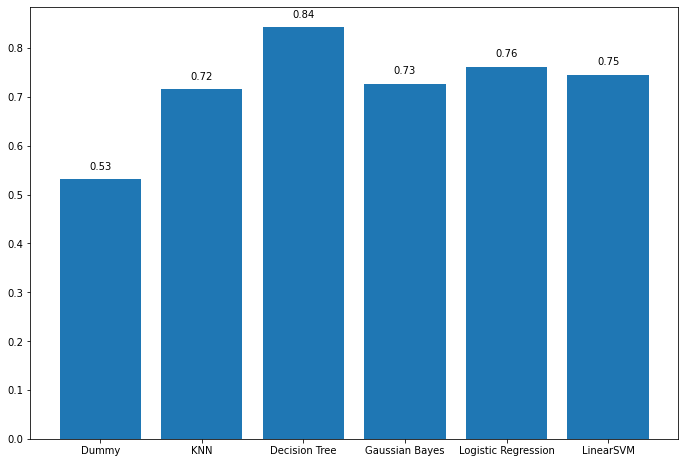

In [74]:
results = [dummy_clf_score,knn_clf_score,dt_clf_score,gnb_clf_score,lg_clf_score,svm_clf_score]
names = ['Dummy', 'KNN', 'Decision Tree', 'Gaussian Bayes','Logistic Regression' ,'LinearSVM']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(names,results)
for x,y in zip(names,results): 
    #to add data labels
    label = "{:.2f}".format(y)
    # label text
    plt.annotate(label,
                 (x,y), # The point (x, y) to annotate
                 textcoords="offset points", # offset (in points) from the xy value
                 xytext=(0,10), # position (x, y) to place the text at. 
                 ha='center') # horizontal alignment is center in this case           
plt.show()

# Experiment Set 2: Selecting Features

In [75]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,667,2,0,34,5,0.00,2,1,0,163830.64
9275,427,1,1,42,1,75681.52,1,1,1,57098.00
2995,535,0,0,29,2,112367.34,1,1,0,185630.76
5316,654,2,1,40,5,105683.63,1,1,0,173617.09
356,850,2,0,57,8,126776.30,2,1,1,132298.49


In [76]:
x_train_cont = x_train.drop(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember'], axis = 1)
x_train_cont.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
7389,667,34,5,0.00,163830.64
9275,427,42,1,75681.52,57098.00
2995,535,29,2,112367.34,185630.76
5316,654,40,5,105683.63,173617.09
356,850,57,8,126776.30,132298.49


In [77]:
x_train_cat = x_train.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'], axis = 1)
x_train_cat.head()

,Geography,Gender,NumOfProducts,HasCrCard,IsActiveMember
7389,2,0,2,1,0
9275,1,1,1,1,1
2995,0,0,1,1,0
5316,2,1,1,1,0
356,2,0,2,1,1


### Filter Approach

#### Variance Threshold

In [78]:
# Import normalizer module
from sklearn import preprocessing

# Create the Scaler object
scaler = preprocessing.Normalizer()

# Fit the data on the Scaler object
scaled_features = scaler.fit_transform(x_train_cont)

# View the first 5 rows of scaled_features array
scaled_features[0:5]

array([[4.07124368e-03, 2.07529663e-04, 3.05190681e-05, 0.00000000e+00,
        9.99991690e-01],
       [4.50396428e-03, 4.43012880e-04, 1.05479257e-05, 7.98283051e-01,
        6.02265463e-01],
       [2.46552980e-03, 1.33645541e-04, 9.21693385e-06, 5.17841170e-01,
        8.55473218e-01],
       [3.21764245e-03, 1.96797703e-04, 2.45997129e-05, 5.19957392e-01,
        8.54186115e-01],
       [4.63879778e-03, 3.11072321e-04, 4.36592732e-05, 6.91870139e-01,
        7.22006990e-01]])

In [79]:
names = x_train_cont.columns

# After normalization, scaled_features is transformed into an array so we need to convert i
scaled_features_df = pd.DataFrame(scaled_features, columns = names)

# Compute the variance of each column
scaled_features_df.var()

CreditScore        2.160530e-03
Age                8.743958e-06
Tenure             2.086968e-07
Balance            1.530019e-01
EstimatedSalary    8.224690e-02
dtype: float64

In [80]:
# Import VarianceThreshold module
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
thresholder = VarianceThreshold(threshold = 0.00001)

# Conduct variance thresholding - fit_transform() takes in an array
features_high_variance = thresholder.fit_transform(scaled_features)

# Use the get_support() function to identify the feature(s) above the variance threshold
thresholder.get_support(indices = True)

array([0, 3, 4], dtype=int64)

#### Chi-Square

In [81]:
# Import SelectKBest and chi2 modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(chi2, k = 3)

# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train_cat, y_train)
selector.get_support(indices=True)

array([0, 1, 4], dtype=int64)

#### Information Gain

In [82]:
# Import SelectKBest and mutual_info_classif modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(mutual_info_classif, k = 3)

# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train_cat, y_train)
selector.get_support(indices=True)

array([0, 2, 4], dtype=int64)

#### ANOVA

In [83]:
# Import SelectKBest and f_classif modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create a selector
# Setting k = 3 means we want the top 3 features
selector = SelectKBest(f_classif, k = 3)

# Select top 3 features based on the training set
x_new = selector.fit_transform(x_train_cont, y_train)
selector.get_support(indices=True)

array([0, 1, 3], dtype=int64)

Two filter methods have been applied to categorical and continuous variables each.
- Variance threshold and ANOVA for continuous features and categorical target
- Chi-square and information gain for categorical features and target

Subsets obtained
- Variance threshold = CreditScore, Balance, EstimatedSalary
- ANOVA = CreditScore, Age, Balance
- Chi-square = Geography, Gender, IsActiveMember
- Information Gain = Geography, NumOfProducts, IsActiveMember

There are some overlapping features in the subsets.
- It seems that CreditScore and Balance are good continuous predictors of Exited.
- It seems that Geography and IsActiveMember are good categorical predictors of Exited.

There are four combination of subsets.
- CreditScore, Balance, Geography, IsActiveMember, EstimatedSalary, Gender
- CreditScore, Balance, Geography, IsActiveMember, EstimatedSalary, NumOfProducts
- CreditScore, Balance, Geography, IsActiveMember, Age, Gender
- CreditScore, Balance, Geography, IsActiveMember, Age, NumOfProducts

### Wrapper Approach

In [84]:
# Import RFE and the best ML algorithm from Experiment Set 1
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)

In [85]:
rfe = RFE(estimator = dtree, n_features_to_select = 6, step = 1)
rfe.fit(x_train, y_train)

print("Number of Features: ", rfe.n_features_)
print("Feature Ranking: ", rfe.ranking_)
print("Selected Features: ", rfe.support_)

Number of Features:  6
Feature Ranking:  [5 4 3 1 2 1 1 1 1 1]
Selected Features:  [False False False  True False  True  True  True  True  True]


### Train Models

In [86]:
FilterSet1_x_train = x_train[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'EstimatedSalary', 'Gender']]
FilterSet1_x_test = x_test[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'EstimatedSalary', 'Gender']]

FilterSet2_x_train = x_train[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'EstimatedSalary', 'NumOfProducts']]
FilterSet2_x_test = x_test[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'EstimatedSalary', 'NumOfProducts']]

FilterSet3_x_train = x_train[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'Age', 'Gender']]
FilterSet3_x_test = x_test[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'Age', 'Gender']]

FilterSet4_x_train = x_train[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'Age', 'NumOfProducts']]
FilterSet4_x_test = x_test[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'Age', 'NumOfProducts']]

wrapperdtree_x_train = x_train.drop(['CreditScore', 'Geography', 'Gender', 'Tenure'], axis = 1)
wrapperdtree_x_test = x_test.drop(['CreditScore', 'Geography', 'Gender', 'Tenure'], axis = 1)

#### Filter Approach Subset 1

In [87]:
# train and validate
dtree1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree1.fit(FilterSet1_x_train, y_train)
dtree1_score = cross_validation(dtree1, FilterSet1_x_train, y_train, 10)
dtree1_score

C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

{'Training Accuracy': 0.7976527777777778,
 'Training Precision (weighted_Avg)': 0.7587507769339441,
 'Training Recall (weighted_Avg)': 0.7976527777777778,
 'Training F1 Score (weighted_Avg)': 0.7252967687992068,
 'Validation Accuracy': 0.791,
 'Validation Precision (weighted_Avg)': 0.6929555586104262,
 'Validation Recall (weighted_Avg)': 0.791,
 'Validation F1 Score (weighted_Avg)': 0.7166871960906677}

In [88]:
# testing
y_predict = dtree1.predict(FilterSet1_x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree1_score= f1_score(y_test, y_predict, average='weighted')

[[1594    1]
 [ 404    1]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.50      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.65      0.50      0.45      2000
weighted avg       0.74      0.80      0.71      2000



#### Filter Approach Subset 2

In [89]:
# train and validate
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree2.fit(FilterSet2_x_train, y_train)
dtree2_score = cross_validation(dtree2, FilterSet2_x_train, y_train, 10)
dtree2_score

{'Training Accuracy': 0.8218194444444444,
 'Training Precision (weighted_Avg)': 0.7996832445590603,
 'Training Recall (weighted_Avg)': 0.8218194444444444,
 'Training F1 Score (weighted_Avg)': 0.7977605122449635,
 'Validation Accuracy': 0.8213750000000001,
 'Validation Precision (weighted_Avg)': 0.7990458431272298,
 'Validation Recall (weighted_Avg)': 0.8213750000000001,
 'Validation F1 Score (weighted_Avg)': 0.7971225947505752}

In [90]:
# testing
y_predict = dtree2.predict(FilterSet2_x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree2_score= f1_score(y_test, y_predict, average='weighted')

[[1512   83]
 [ 263  142]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1595
           1       0.63      0.35      0.45       405

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.81      0.83      0.81      2000



#### Filter Approach Subset 3

In [91]:
# train and validate
dtree3 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree3.fit(FilterSet3_x_train, y_train)
dtree3_score = cross_validation(dtree3, FilterSet3_x_train, y_train, 10)
dtree3_score

{'Training Accuracy': 0.8304722222222223,
 'Training Precision (weighted_Avg)': 0.814949898672064,
 'Training Recall (weighted_Avg)': 0.8304722222222223,
 'Training F1 Score (weighted_Avg)': 0.8015208388127707,
 'Validation Accuracy': 0.826375,
 'Validation Precision (weighted_Avg)': 0.8074001775954006,
 'Validation Recall (weighted_Avg)': 0.826375,
 'Validation F1 Score (weighted_Avg)': 0.7974194668909808}

In [92]:
# testing
y_predict = dtree3.predict(FilterSet3_x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree3_score= f1_score(y_test, y_predict, average='weighted')

[[1532   63]
 [ 271  134]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1595
           1       0.68      0.33      0.45       405

    accuracy                           0.83      2000
   macro avg       0.76      0.65      0.67      2000
weighted avg       0.82      0.83      0.81      2000



#### Filter Approach Subset 4

In [93]:
# train and validate
dtree4 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree4.fit(FilterSet4_x_train, y_train)
dtree4_score = cross_validation(dtree4, FilterSet4_x_train, y_train, 10)
dtree4_score

{'Training Accuracy': 0.8497083333333334,
 'Training Precision (weighted_Avg)': 0.8379784072154587,
 'Training Recall (weighted_Avg)': 0.8497083333333334,
 'Training F1 Score (weighted_Avg)': 0.8327658874097732,
 'Validation Accuracy': 0.849,
 'Validation Precision (weighted_Avg)': 0.8372715726564589,
 'Validation Recall (weighted_Avg)': 0.849,
 'Validation F1 Score (weighted_Avg)': 0.8317910199659979}

In [94]:
# testing
y_predict = dtree4.predict(FilterSet4_x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree4_score= f1_score(y_test, y_predict, average='weighted')

[[1520   75]
 [ 216  189]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.47      0.57       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



#### Subset From Wrapper Approach

In [95]:
# train and validate
dtree5 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree5.fit(wrapperdtree_x_train, y_train)
dtree5_score = cross_validation(dtree5, wrapperdtree_x_train, y_train, 10)
dtree5_score

{'Training Accuracy': 0.8497083333333334,
 'Training Precision (weighted_Avg)': 0.8379784072154587,
 'Training Recall (weighted_Avg)': 0.8497083333333334,
 'Training F1 Score (weighted_Avg)': 0.8327658874097732,
 'Validation Accuracy': 0.849,
 'Validation Precision (weighted_Avg)': 0.8372715726564589,
 'Validation Recall (weighted_Avg)': 0.849,
 'Validation F1 Score (weighted_Avg)': 0.8317910199659979}

In [96]:
# testing
y_predict = dtree5.predict(wrapperdtree_x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree5_score= f1_score(y_test, y_predict, average='weighted')

[[1520   75]
 [ 216  189]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.47      0.57       405

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



### Principal Component Analysis

In [97]:
# Import PCA
from sklearn.decomposition import PCA

# Specify the number of components = 2
pca = PCA(n_components = 2)

# Create the Scaler object
scaler = preprocessing.Normalizer()

# Fit the data on the Scaler object
scaled_features_pca_train = scaler.fit_transform(x_train)
scaled_features_pca_test = scaler.fit_transform(x_test)
pca.fit(scaled_features_pca_train)

# Transform the training set into principal components
train_pca = pca.transform(scaled_features_pca_train)

# Transform the test set into principal components
test_pca = pca.transform(scaled_features_pca_test)

# Convert train set into a data frame to make it easier to view
principalDf = pd.DataFrame(data = train_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.547383,0.054305
1,0.333802,-0.079835
2,-0.041351,-0.124835
3,-0.038891,-0.124901
4,0.177757,-0.115944


In [98]:
print('Explained variance by component: ', pca.explained_variance_ratio_)

Explained variance by component:  [0.94557897 0.04615028]


In [99]:
# train and validate
dtree6 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)
dtree6.fit(train_pca, y_train)
dtree6_score = cross_validation(dtree6, train_pca, y_train, 10)
dtree6_score

C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Training Accuracy': 0.7974166666666667,
 'Training Precision (weighted_Avg)': 0.7934761777256485,
 'Training Recall (weighted_Avg)': 0.7974166666666667,
 'Training F1 Score (weighted_Avg)': 0.7101346911692071,
 'Validation Accuracy': 0.7955,
 'Validation Precision (weighted_Avg)': 0.7007755395244274,
 'Validation Recall (weighted_Avg)': 0.7955,
 'Validation F1 Score (weighted_Avg)': 0.7078899703642543}

In [100]:
# testing
y_predict = dtree6.predict(test_pca)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
dtree6_score= f1_score(y_test, y_predict, average='weighted')

[[1592    3]
 [ 405    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



### Performance Comparison 

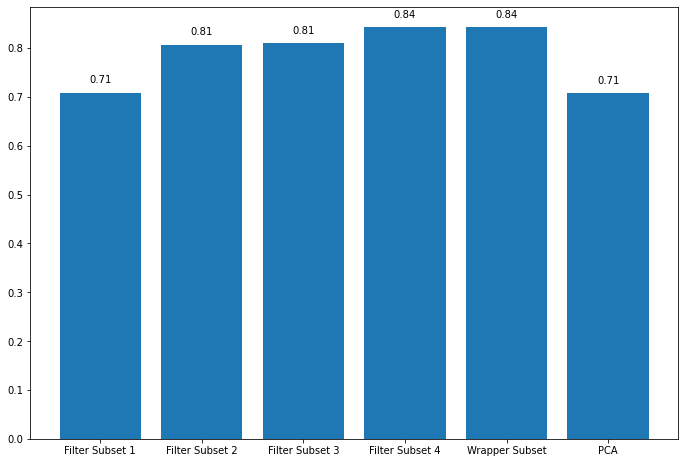

In [101]:
# Plots a bar graph to easily visualise difference in performance.

results = [dtree1_score, dtree2_score, dtree3_score, dtree4_score, dtree5_score, dtree6_score]
names = ['Filter Subset 1', 'Filter Subset 2', 'Filter Subset 3', 'Filter Subset 4', 'Wrapper Subset', 'PCA']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(names,results)
for x,y in zip(names,results): #to add data labels
    label = "{:.2f}".format(y)
    plt.annotate(label, # label text
                 (x,y), # The point (x, y) to annotate
                 textcoords="offset points", # offset (in points) from the xy value
                 xytext=(0,10), # position (x, y) to place the text at. 
                 ha='center') # horizontal alignment is center in this case           
plt.show()

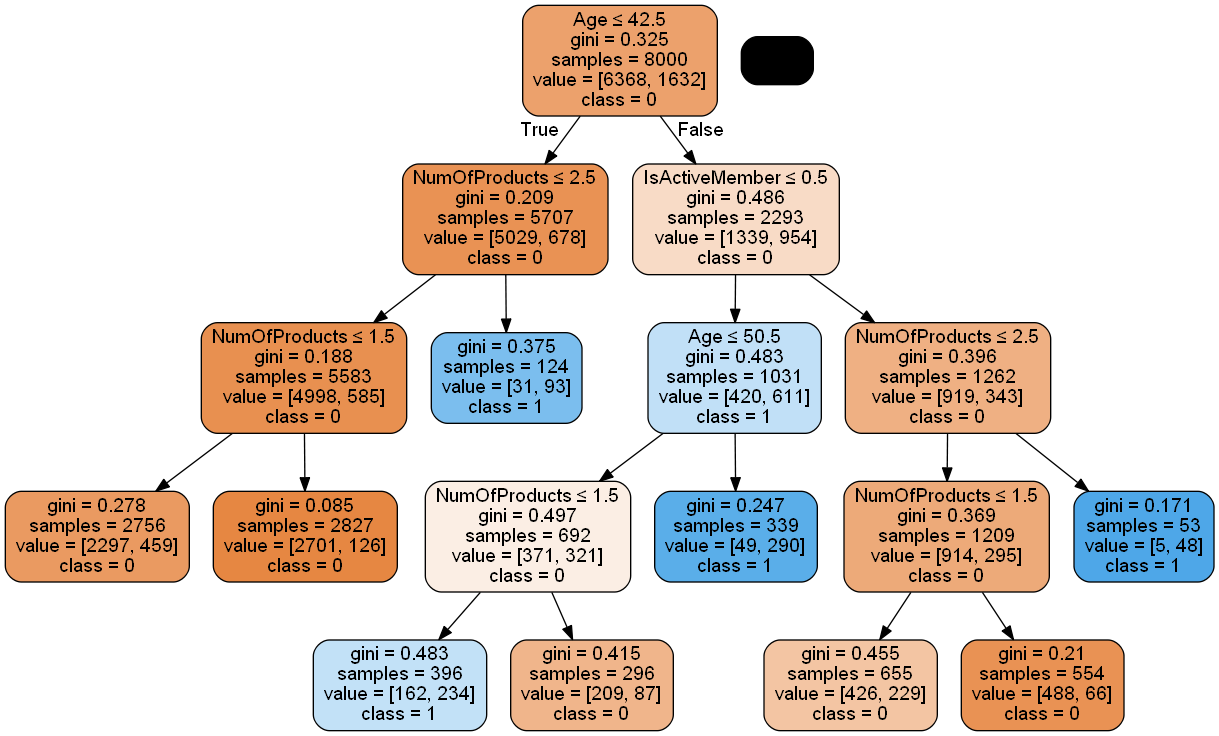

In [102]:
# Dispaly the tree for filter subset 4
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image
# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree4, out_file = dot_data,
class_names = ['0', '1'], # name of each of the target classes in asce
feature_names = FilterSet4_x_train.columns, # the feature names.
filled = True, # whether to fill in the boxes with colors.
rounded = True, # whether to round the corners of the boxes.
special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [103]:
# Load export_text library
from sklearn.tree import export_text
tree_rules = export_text(dtree4, feature_names=list(FilterSet4_x_train))
# Print deccision tree rules
print(tree_rules)

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- class: 1
|--- Age >  42.50
|   |--- IsActiveMember <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  50.50
|   |   |   |--- class: 1
|   |--- IsActiveMember >  0.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1



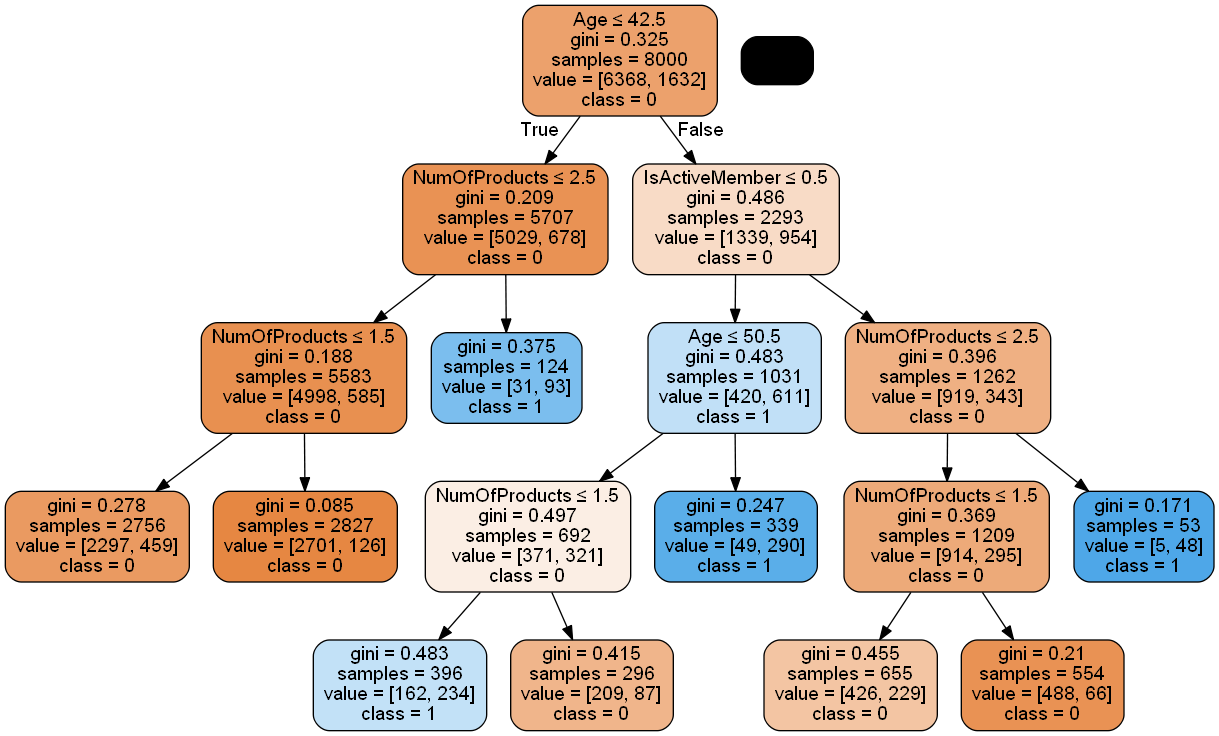

In [104]:
# Dispaly the tree for wrapper subset
# Visualize decision tree
dot_data = StringIO()
tree.export_graphviz(dtree5, out_file = dot_data,
class_names = ['0', '1'], # name of each of the target classes in asce
feature_names = wrapperdtree_x_train.columns, # the feature names.
filled = True, # whether to fill in the boxes with colors.
rounded = True, # whether to round the corners of the boxes.
special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [105]:
tree_rules = export_text(dtree5, feature_names=list(wrapperdtree_x_train))
# Print deccision tree rules
print(tree_rules)

|--- Age <= 42.50
|   |--- NumOfProducts <= 2.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.50
|   |   |   |--- class: 0
|   |--- NumOfProducts >  2.50
|   |   |--- class: 1
|--- Age >  42.50
|   |--- IsActiveMember <= 0.50
|   |   |--- Age <= 50.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  50.50
|   |   |   |--- class: 1
|   |--- IsActiveMember >  0.50
|   |   |--- NumOfProducts <= 2.50
|   |   |   |--- NumOfProducts <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumOfProducts >  1.50
|   |   |   |   |--- class: 0
|   |   |--- NumOfProducts >  2.50
|   |   |   |--- class: 1



# Experiment Set 3: Ensemble Learning

To get the best performing model and its parameters according to the F1-Score performance metric.

### Bagging


In [106]:
# Importing needed libraries and finding optimal n_estimators value.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0)
n_estimators= [2, 5, 10,15, 20]
grid = dict(n_estimators=n_estimators)
gridSearch(BaggingClassifier(base_estimator = dt_clf, n_estimators = 10, random_state = 0),grid,x_train,y_train)

Best: 0.834705 using {'n_estimators': 10}
0.827293 (0.018077) with: {'n_estimators': 2}
0.832631 (0.011942) with: {'n_estimators': 5}
0.834705 (0.012637) with: {'n_estimators': 10}
0.834649 (0.012257) with: {'n_estimators': 15}
0.833992 (0.012534) with: {'n_estimators': 20}


In [107]:
# Bagging section
model_bagging = BaggingClassifier(base_estimator = dt_clf, n_estimators = 10, random_state = 0)
model_bagging.fit(x_train,y_train)
model_bagging_score=cross_validation(model_bagging, x_train, y_train, 10)
model_bagging_score

{'Training Accuracy': 0.8532777777777778,
 'Training Precision (weighted_Avg)': 0.8433709427379015,
 'Training Recall (weighted_Avg)': 0.8532777777777778,
 'Training F1 Score (weighted_Avg)': 0.8357872543753008,
 'Validation Accuracy': 0.852375,
 'Validation Precision (weighted_Avg)': 0.8424853584538241,
 'Validation Recall (weighted_Avg)': 0.852375,
 'Validation F1 Score (weighted_Avg)': 0.8347045625847878}

In [108]:
# Bagging model test
y_predict=model_bagging.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
model_bagging_score= f1_score(y_test, y_predict, average='weighted')

[[1543   52]
 [ 220  185]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.78      0.46      0.58       405

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000



### Boosting

In [109]:
# Import Boost library 
from sklearn.ensemble import AdaBoostClassifier
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0)
n_estimators= [2, 5, 10,15, 20]
learning_rate=[0.001, 0.1,1,10]
grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
gridSearch(AdaBoostClassifier(base_estimator = dt_clf, n_estimators = 10, random_state = 0),grid,x_train,y_train)

Best: 0.843479 using {'learning_rate': 1, 'n_estimators': 5}
0.831791 (0.011062) with: {'learning_rate': 0.001, 'n_estimators': 2}
0.831791 (0.011062) with: {'learning_rate': 0.001, 'n_estimators': 5}
0.832601 (0.012460) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.832601 (0.012460) with: {'learning_rate': 0.001, 'n_estimators': 15}
0.832601 (0.012460) with: {'learning_rate': 0.001, 'n_estimators': 20}
0.834618 (0.013436) with: {'learning_rate': 0.1, 'n_estimators': 2}
0.836520 (0.012451) with: {'learning_rate': 0.1, 'n_estimators': 5}
0.832062 (0.012363) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.833299 (0.010893) with: {'learning_rate': 0.1, 'n_estimators': 15}
0.835568 (0.012886) with: {'learning_rate': 0.1, 'n_estimators': 20}
0.829947 (0.010451) with: {'learning_rate': 1, 'n_estimators': 2}
0.843479 (0.014715) with: {'learning_rate': 1, 'n_estimators': 5}
0.843212 (0.014386) with: {'learning_rate': 1, 'n_estimators': 10}
0.840531 (0.014729) with: {'learning_rate': 

In [110]:
model_boosting = AdaBoostClassifier(base_estimator = dt_clf, n_estimators = 5, learning_rate=1,random_state = 0)
model_boosting.fit(x_train,y_train)
model_boosting_score=cross_validation(model_boosting, x_train, y_train, 10)
model_boosting_score

{'Training Accuracy': 0.8620277777777776,
 'Training Precision (weighted_Avg)': 0.8534388142016234,
 'Training Recall (weighted_Avg)': 0.8620277777777776,
 'Training F1 Score (weighted_Avg)': 0.8487468210982957,
 'Validation Accuracy': 0.8573749999999999,
 'Validation Precision (weighted_Avg)': 0.8476187893923669,
 'Validation Recall (weighted_Avg)': 0.8573749999999999,
 'Validation F1 Score (weighted_Avg)': 0.8434787782312732}

In [111]:
# testing
y_predict=model_boosting.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
model_boosting_score= f1_score(y_test, y_predict, average='weighted') 

[[1507   88]
 [ 187  218]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1595
           1       0.71      0.54      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### Voting

In [112]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0)
knn_clf = KNeighborsClassifier(n_neighbors=9,weights='uniform',p=2) 
gnb_clf = GaussianNB()
lg_clf = LogisticRegression(penalty = 'l1',C=1, solver='liblinear',random_state=0)
svm_clf = LinearSVC(random_state=0,dual=False,C=10,max_iter=1000, penalty='l1')

model_voting = VotingClassifier(estimators = [('gnb', gnb_clf), ('dt', dt_clf), ('svm', svm_clf),('lg', lg_clf),('knn', knn_clf)], voting = 'hard')
model_voting.fit(x_train,y_train)
model_voting_score=cross_validation(model_voting, x_train, y_train, 10)
model_voting_score

{'Training Accuracy': 0.8040416666666668,
 'Training Precision (weighted_Avg)': 0.7694483028672217,
 'Training Recall (weighted_Avg)': 0.8040416666666668,
 'Training F1 Score (weighted_Avg)': 0.7469503211128148,
 'Validation Accuracy': 0.803125,
 'Validation Precision (weighted_Avg)': 0.768169926353836,
 'Validation Recall (weighted_Avg)': 0.803125,
 'Validation F1 Score (weighted_Avg)': 0.7450917903657436}

In [113]:
# testing
y_predict=model_voting.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
model_voting_score= f1_score(y_test, y_predict, average='weighted')

[[1558   37]
 [ 357   48]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1595
           1       0.56      0.12      0.20       405

    accuracy                           0.80      2000
   macro avg       0.69      0.55      0.54      2000
weighted avg       0.76      0.80      0.75      2000



### Stacking

In [114]:
# Import Stacking library
from sklearn.ensemble import StackingClassifier
model_stacking = StackingClassifier(estimators = [('gnb', gnb_clf),('svm', svm_clf),('lg', lg_clf),('knn', knn_clf)],final_estimator = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0))
model_stacking.fit(x_train,y_train)
model_stacking_score=cross_validation(model_voting, x_train, y_train, 10)
model_stacking_score

{'Training Accuracy': 0.8040416666666668,
 'Training Precision (weighted_Avg)': 0.7694483028672217,
 'Training Recall (weighted_Avg)': 0.8040416666666668,
 'Training F1 Score (weighted_Avg)': 0.7469503211128148,
 'Validation Accuracy': 0.803125,
 'Validation Precision (weighted_Avg)': 0.768169926353836,
 'Validation Recall (weighted_Avg)': 0.803125,
 'Validation F1 Score (weighted_Avg)': 0.7450917903657436}

In [115]:
# testing
y_predict=model_stacking.predict(x_test)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
model_stacking_score= f1_score(y_test, y_predict, average='weighted')

[[1528   67]
 [ 290  115]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1595
           1       0.63      0.28      0.39       405

    accuracy                           0.82      2000
   macro avg       0.74      0.62      0.64      2000
weighted avg       0.80      0.82      0.79      2000



### Performance Comparison

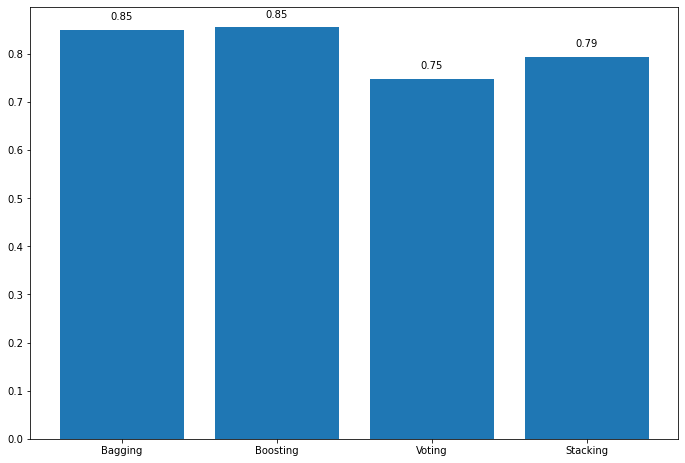

In [116]:
# Bar plot to show and compare the results
results = [model_bagging_score, model_boosting_score, model_voting_score, model_stacking_score]
names = ['Bagging', 'Boosting', 'Voting', 'Stacking']
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.bar(names,results)
for x,y in zip(names,results): #to add data labels
    label = "{:.2f}".format(y)
    plt.annotate(label, # label text
                 (x,y), # The point (x, y) to annotate
                 textcoords="offset points", # offset (in points) from the xy value
                 xytext=(0,10), # position (x, y) to place the text at. 
                 ha='center') # horizontal alignment is center in this case           
plt.show()

# Experiment Set 4: Varying training sample size

### Experiment Set 1 Model (Decision Tree with Original Training Data)

Varying Training Sample Size Results for Set 1:
 
Training size = 0.10, F1_score = 0.8385
Training size = 0.20, F1_score = 0.8265
Training size = 0.30, F1_score = 0.8290
Training size = 0.40, F1_score = 0.8306
Training size = 0.50, F1_score = 0.8336
Training size = 0.60, F1_score = 0.8294
Training size = 0.70, F1_score = 0.8310
Training size = 0.80, F1_score = 0.8324
Training size = 0.90, F1_score = 0.8338
Training size = 1.00, F1_score = 0.8286


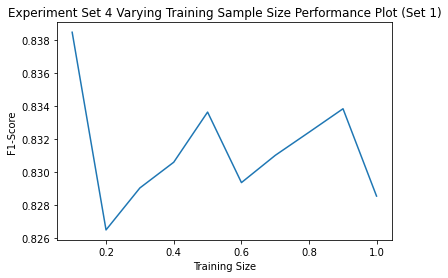

In [117]:
# Varying training sample size for Set 1 Model
training_size = []
metric_score = []
Y_ = []

exset1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1,random_state=0)
print('Varying Training Sample Size Results for Set 1:\n ')

# To iterate from 10% to 100% of training data size
for j in range (1,10):
    train_size = 0 + (j*0.1)
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = train_size, random_state = 0)
    exset1.fit(x_train, y_train)
    y_predict = exset1.predict(x_test)
    exset1_clf_score = f1_score(y_test, y_predict, average='weighted')
    metric_score += [exset1_clf_score]
    training_size.append(train_size)
    
    # Array is for line plot purpose
    Y_.append(np.array(metric_score).mean())
    print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')

    # To get around train_test_split module train_size = 1.0 parameter error limitation
    if j == 9:
        train_size = 0.999
        x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = train_size, random_state = 0)
        exset1.fit(x_train, y_train)
        y_predict = exset1.predict(x_test)
        exset1_clf_score = f1_score(y_test, y_predict, average='weighted')
        metric_score += [exset1_clf_score]
        training_size.append(train_size)
        Y_.append(np.array(metric_score).mean())
        print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')    

plt.plot(training_size, Y_)
plt.title('Experiment Set 4 Varying Training Sample Size Performance Plot (Set 1)')
plt.xlabel('Training Size')
plt.ylabel('F1-Score')
plt.show()

        


### Experiment Set 2 Model (Decision Tree with Filter Approach Data)

In [118]:
# To structure the FilterSet4 data back into a single dataframe
FilterSet4 = features[['CreditScore', 'Balance', 'Geography', \
                                   'IsActiveMember', 'Age', 'NumOfProducts']]
FilterSet4.shape

(10000, 6)

Varying Training Sample Size Results for Set 2: 

Training size = 0.10, F1_score = 0.8385
Training size = 0.20, F1_score = 0.8265
Training size = 0.30, F1_score = 0.8290
Training size = 0.40, F1_score = 0.8306
Training size = 0.50, F1_score = 0.8336
Training size = 0.60, F1_score = 0.8294
Training size = 0.70, F1_score = 0.8310
Training size = 0.80, F1_score = 0.8324
Training size = 0.90, F1_score = 0.8338
Training size = 1.00, F1_score = 0.8286


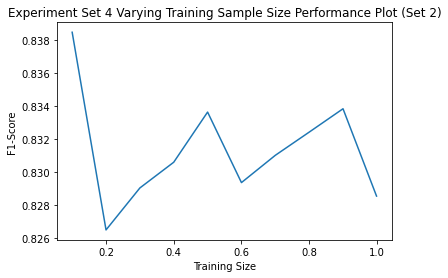

In [119]:
# Varying training sample sizes for Set 2
training_size = []
metric_score = []
Y_ = []

exset2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_leaf_nodes= 9, min_samples_leaf= 1, random_state=0)

print(f'Varying Training Sample Size Results for Set 2: \n')

for j in range (1,10):
    train_size = 0 + (j*0.1)
    x_train, x_test, y_train, y_test = train_test_split(FilterSet4, target, train_size = train_size, random_state = 0)
    exset2.fit(x_train, y_train)
    y_predict = exset2.predict(x_test)
    exset2_clf_score = f1_score(y_test, y_predict, average='weighted')
    metric_score += [exset2_clf_score]
    training_size.append(train_size)
    Y_.append(np.array(metric_score).mean())
    print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')
    if j == 9:
        train_size = 0.999
        x_train, x_test, y_train, y_test = train_test_split(FilterSet4, target, train_size = train_size, random_state = 0)
        exset2.fit(x_train, y_train)
        y_predict = exset2.predict(x_test)
        exset2_clf_score = f1_score(y_test, y_predict, average='weighted')
        metric_score += [exset2_clf_score]
        training_size.append(train_size)
        Y_.append(np.array(metric_score).mean())
        print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')

plt.plot(training_size, Y_)
plt.title('Experiment Set 4 Varying Training Sample Size Performance Plot (Set 2)')
plt.xlabel('Training Size')
plt.ylabel('F1-Score')
plt.show()

### Experiment Set 3 Model (Decision Tree with Bagging)

Varying Training Sample Size Results for Set 3: 

Training size = 0.10, F1_score = 0.8335
Training size = 0.20, F1_score = 0.8340
Training size = 0.30, F1_score = 0.8351
Training size = 0.40, F1_score = 0.8359
Training size = 0.50, F1_score = 0.8363
Training size = 0.60, F1_score = 0.8367
Training size = 0.70, F1_score = 0.8373
Training size = 0.80, F1_score = 0.8379
Training size = 0.90, F1_score = 0.8377
Training size = 1.00, F1_score = 0.8320


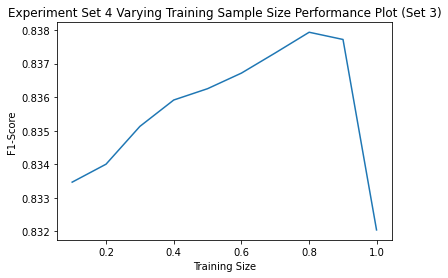

In [120]:
# Varying training sample sizes for Set 3
training_size = []
metric_score = []
Y_ = []

exset3 = BaggingClassifier(base_estimator = exset1, n_estimators = 10, random_state = 0)

print(f'Varying Training Sample Size Results for Set 3: \n')

for j in range (1,10):
    train_size = 0 + (j*0.1)
    x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = train_size, random_state = 0)
    exset3.fit(x_train, y_train)
    y_predict = exset1.predict(x_test)
    exset3_clf_score = f1_score(y_test, y_predict, average='weighted')
    metric_score += [exset3_clf_score]
    training_size.append(train_size)
    Y_.append(np.array(metric_score).mean())
    print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')
    if j == 9:
        train_size = 0.999
        x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = train_size, random_state = 0)
        exset3.fit(x_train, y_train)
        y_predict = exset1.predict(x_test)
        exset3_clf_score = f1_score(y_test, y_predict, average='weighted')
        metric_score += [exset3_clf_score]
        training_size.append(train_size)
        Y_.append(np.array(metric_score).mean())
        print(f'Training size = {train_size:.2f}, F1_score = {np.array(metric_score).mean():.4f}')

plt.plot(training_size, Y_)
plt.title('Experiment Set 4 Varying Training Sample Size Performance Plot (Set 3)')
plt.xlabel('Training Size')
plt.ylabel('F1-Score')
plt.show()


# Extra Experiment (Normalised the dataset)

In [121]:
# normalisation testing
from sklearn.preprocessing import Normalizer
scaler =Normalizer()
scaled_features = scaler.fit_transform(features)
normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(scaled_features, target, test_size = 0.2, random_state = 0)

In [122]:
# Hyperparameter search
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=0)
max_depth = range(1,10)
min_samples_leaf=range(1,30)
max_leaf_nodes=range(2,10)
criterion = ["gini", "entropy"]
grid = dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,max_leaf_nodes=max_leaf_nodes,criterion=criterion)
gridSearch(dt_clf,grid,normal_x_train,normal_y_train)

Best: 0.777071 using {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 9, 'min_samples_leaf': 29}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 1}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 2}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 3}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 4}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 5}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 6}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 7}
0.705586 (0.000690) with: {'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_leaf': 8}
0.705586 (0.000690) with: {'crit

In [123]:
# train and validate
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_leaf_nodes= 9, min_samples_leaf= 29,random_state=0)
dt_clf.fit(x_train,y_train)
dt_score=cross_validation(dt_clf, normal_x_train, normal_y_train, 10)
dt_score

{'Training Accuracy': 0.8179861111111111,
 'Training Precision (weighted_Avg)': 0.7939576415796502,
 'Training Recall (weighted_Avg)': 0.8179861111111111,
 'Training F1 Score (weighted_Avg)': 0.7852737686865723,
 'Validation Accuracy': 0.812,
 'Validation Precision (weighted_Avg)': 0.782659142353157,
 'Validation Recall (weighted_Avg)': 0.812,
 'Validation F1 Score (weighted_Avg)': 0.7770707439984658}

In [124]:
# testing
y_predict=dt_clf.predict(normal_x_test)
print(confusion_matrix(normal_y_test, y_predict))
print(classification_report(normal_y_test, y_predict))
dt_clf_score= f1_score(normal_y_test, y_predict, average='weighted')

[[1595    0]
 [ 405    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\kamka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kamka\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 